# Diseño de Cuadro latino 

* El tratamiento son los métodos de ensamblado.
* Efecto del orden de ensamblado (renglones, primer factor de bloqueo).
* Efecto del operador (columnas, segundo factor de bloqueo).
* La variable respuesta _y_ es el tiempo de ensamblado.

Definiendo el tratamiento:

In [ ]:
trat<-c("c","b","a","d","d","c","b","a","a","d","c","b","b","a","d","c")

Definiendo el operador:

In [ ]:
operador <- rep(c(1:4),each=4)

In [44]:
operador

[1] 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4
Levels: 1 2 3 4

In [ ]:
orden<-c(rep(1:4,4))

In [45]:
orden

[1] 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4
Levels: 1 2 3 4

Definiendo la variable respuesta:

In [ ]:
y<-c(10,7,5,10,14,18,10,10,7,11,11,12,8,8,9,14)

Declaramos como categóricos los factores, además nos aseguramos de que la variable respuesta es numérica:

In [46]:
trat<-as.factor(trat)
orden<-as.factor(orden)
operador<-as.factor(operador)
is.numeric(y)

[1] TRUE

Organizamos los vectores en una base de datos:

In [47]:
datos<-data.frame(cbind(trat,orden,operador,y))
datos

trat,orden,operador,y
<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,10
2,2,1,7
1,3,1,5
4,4,1,10
4,1,2,14
3,2,2,18
2,3,2,10
1,4,2,10
1,1,3,7


## Definiendo el modelo 

En en modelo de cuadro latino los efectos van "sumados"

In [ ]:
m1<-lm(y~trat+ orden+operador)

Tabla de ANOVA del  modelo:

In [48]:
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
trat,3,72.5,24.166667,13.809524,0.004213040
orden,3,18.5,6.166667,3.523810,0.088518683
operador,3,51.5,17.166667,9.809524,0.009925869
Residuals,6,10.5,1.750000,NA,NA


Aquí se observa que hay diferencias estadísticamente significativas con los tratamientos y los operadores, esto último indica que, independientemente del método, los operadores sí tienen diferentes habilidades. También se muestra que el orden no tiene diferencias significativas, al menos con los 4 turnos en los que se hizo la medición, para más turnos, no podemos hacer una inferencia.

## Comparaciones múltiples con prueba de Tukey

In [ ]:
TukeyHSD(aov(y~trat+ orden+operador))

Prueba de Tukey sólo para el factor de  interés:

In [49]:
TukeyHSD(aov(y~trat+ orden+operador),"trat")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = y ~ trat + orden + operador)

$trat
     diff        lwr       upr     p adj
b-a  1.75 -1.4881345 4.9881345 0.3304308
c-a  5.75  2.5118655 8.9881345 0.0034505
d-a  3.50  0.2618655 6.7381345 0.0363534
c-b  4.00  0.7618655 7.2381345 0.0202927
d-b  1.75 -1.4881345 4.9881345 0.3304308
d-c -2.25 -5.4881345 0.9881345 0.1761447


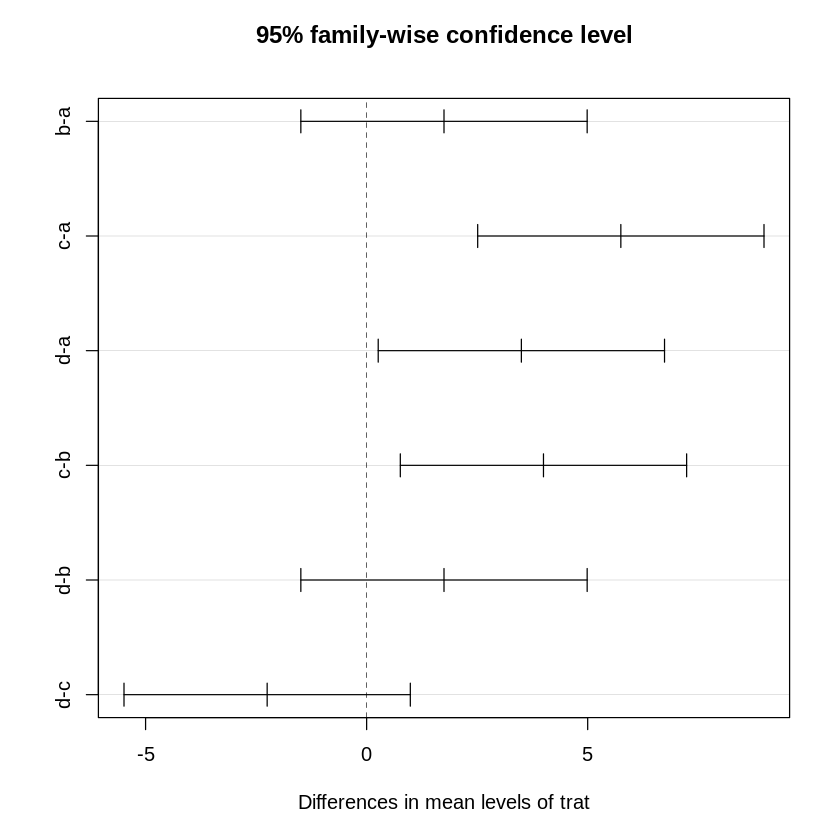

In [50]:
plot(TukeyHSD(aov(y~trat+ orden+operador),"trat"))

## Medias de los tratamientos: 

In [51]:
medias <- tapply(y,trat,mean)
medias

a     b     c     d 
 7.50  9.25 13.25 11.00

Medidas ordenadas de menor a mayor:

In [52]:
ordenando <- sort(medias)
ordenando

a     b     d     c 
 7.50  9.25 11.00 13.25

Creando la gráfica de intervalos de confianza para las medias de cada tratamiento:

In [53]:
ybar <- tapply(y,trat,mean)
ybar

a     b     c     d 
 7.50  9.25 13.25 11.00

In [54]:
n <- tapply(y,trat,length)
n

a b c d 
4 4 4 4

Calculando los cuadrados medios del error:

In [55]:
CME <- anova(m1)["Residuals", "Mean Sq"]
CME

[1] 1.75

Calculando el error estándar de las medias:

In [56]:
sem <- sqrt(CME/n)
sem

a         b         c         d 
0.6614378 0.6614378 0.6614378 0.6614378

Calculando el cuantil:

In [57]:
gle <- anova(m1)["Residuals", "Df"]
gle

[1] 6

In [58]:
cuantil <- qt(0.975,gle)
cuantil

[1] 2.446912

Ahora, con todo lo que acabamos de calcular, hacemos la gráfica:

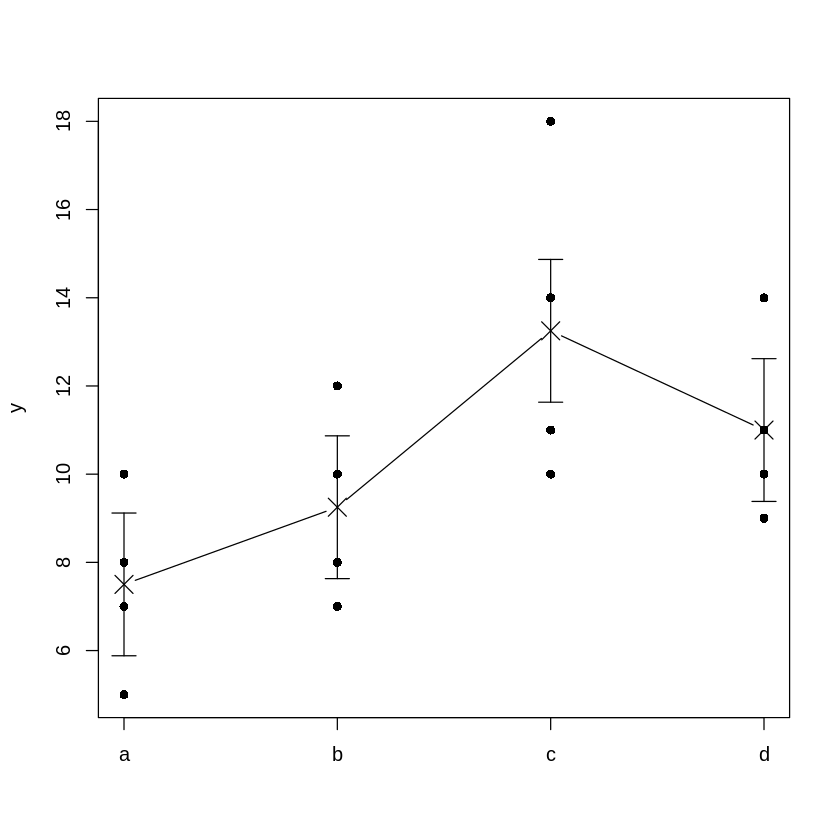

In [59]:
plot.new()
stripchart(y~trat,pch=16,vert=T)
arrows(1:4,medias+cuantil*sem,1:4,medias-cuantil*sem,angle=90,code=3,length=.1)
lines(1:4,medias,pch=4,type="b",cex=2)

# Diagnóstico del modelo

## Análisis de residuos

In [ ]:
residuos<-m1$res
estimados<-m1$fitt

## Probando la normalidad de los errores 

### Histograma de los residuos

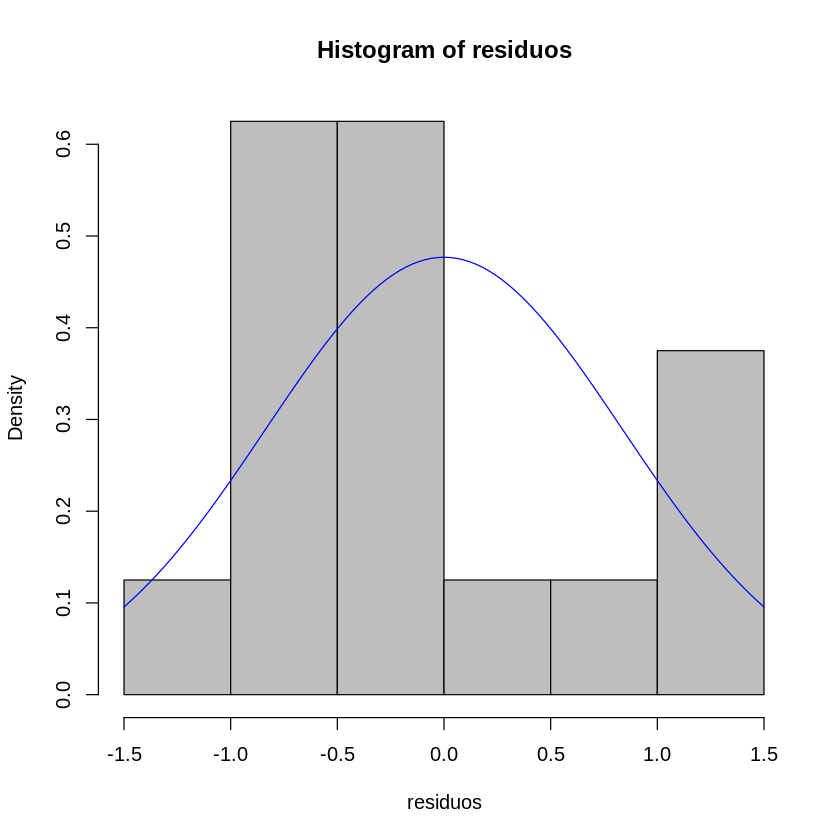

In [60]:
hist(residuos, prob=T, col="gray")
x=residuos
m<-mean(x)
s<-sd(x)
curve(dnorm(x,mean=m,sd=s), col="blue", add=TRUE)

### Diagrama de caja 

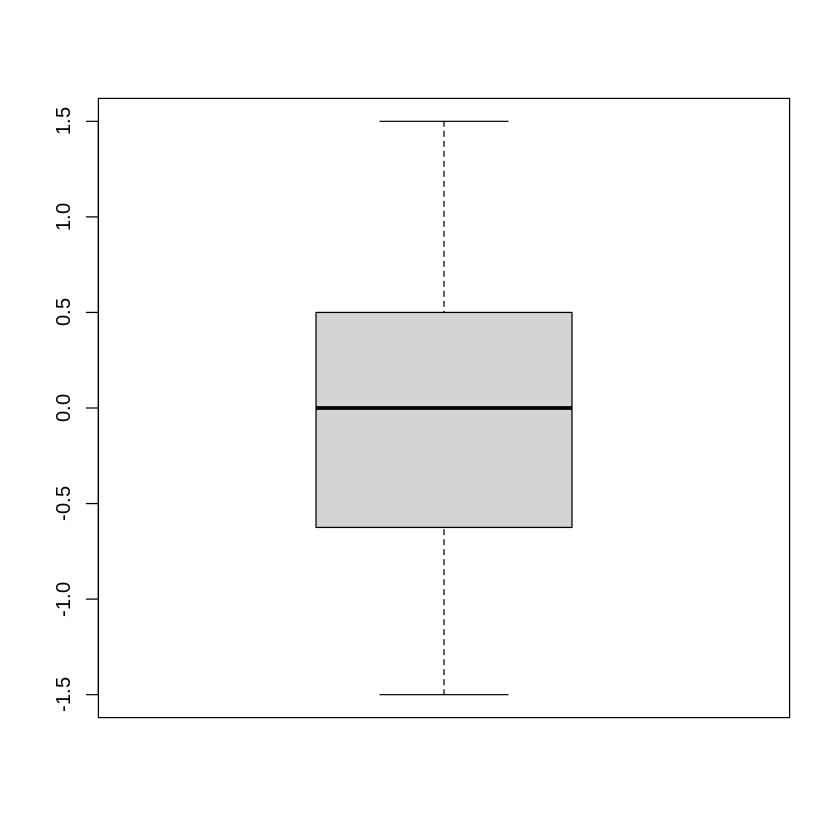

In [61]:
boxplot(residuos)

### Gráfica normal 

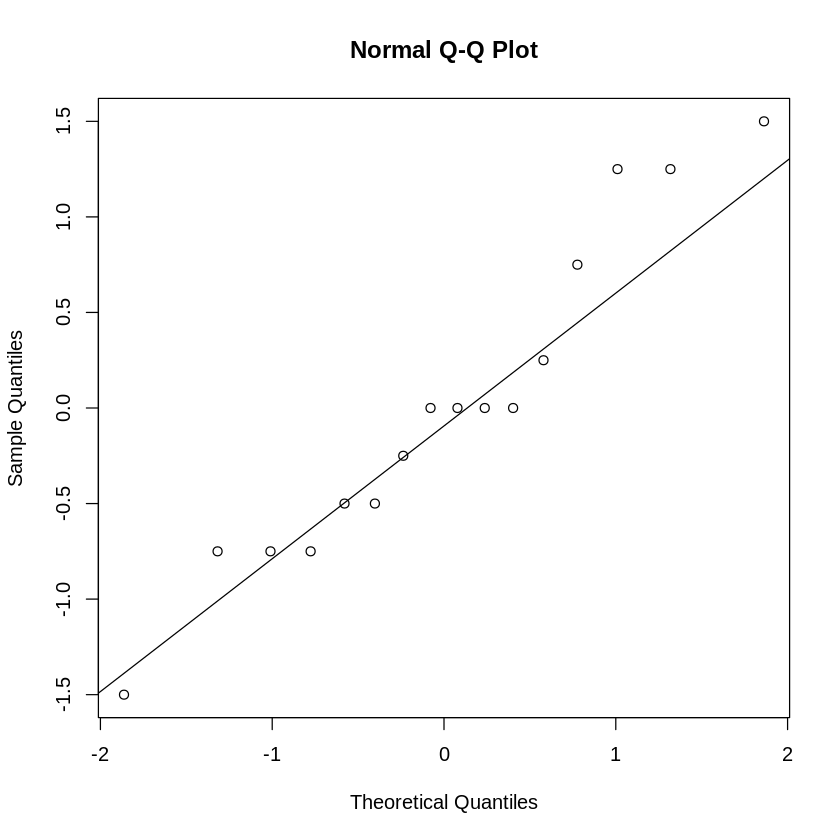

In [62]:
qqnorm(residuos)
qqline(residuos)

### Prueba de normalidad

* Los datos(residuos) se ajustan a una distribución normal  vs 
* Ha: Los datos(residuos) no se ajustan a una distribución normal.

In [43]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.94092, p-value = 0.3604


Ya que $p>0.05$ no se rechaza la hipótesis nula, así que los residuos se ajustan a una distribución normal.

Probando la independencia de los errores:

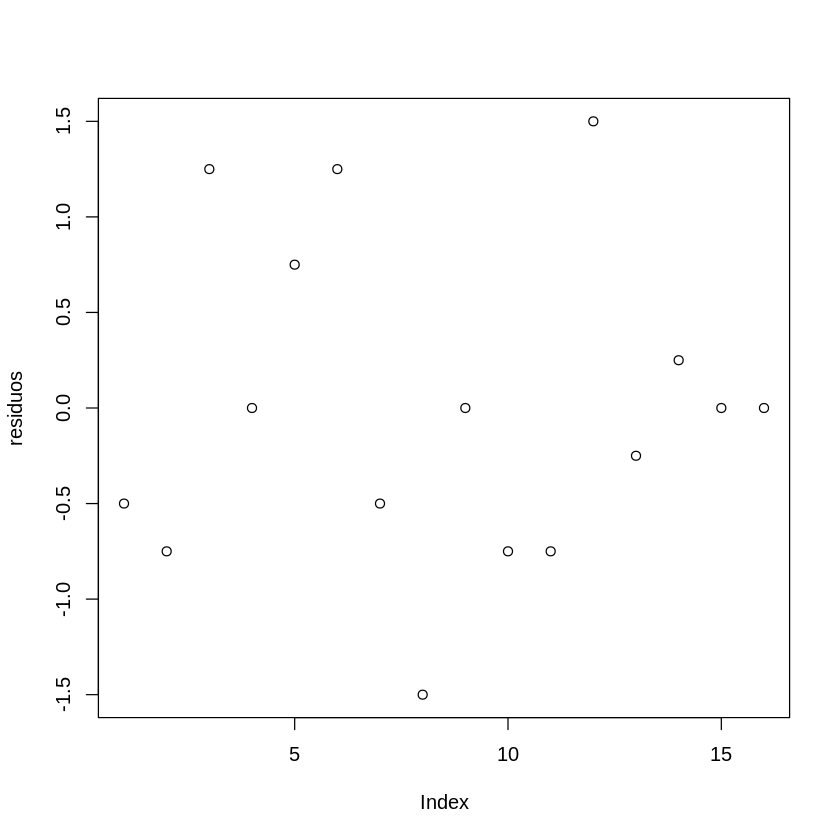

In [64]:
plot(residuos)

## Probando la autocorrelación de los datos 

In [ ]:
library(tseries)

* La prueba de rachas se utiliza para probar autocorrelación de datos.
* Prueba que el signo de los datos es aleatorio:
    * Ho: No hay correlacion vs Ha: Sí hay correlación

In [65]:
runs.test(as.factor(m1$residual<0))


	Runs Test

data:  as.factor(m1$residual < 0)
Standard Normal = 0.51755, p-value = 0.6048
alternative hypothesis: two.sided


Dado el valor de $p$, no se rechaza Ho, por lo que no hay correlación de los datos.

## Probando la homogeneidad de la varianza: 

### Gráfica de residuos vs estimados

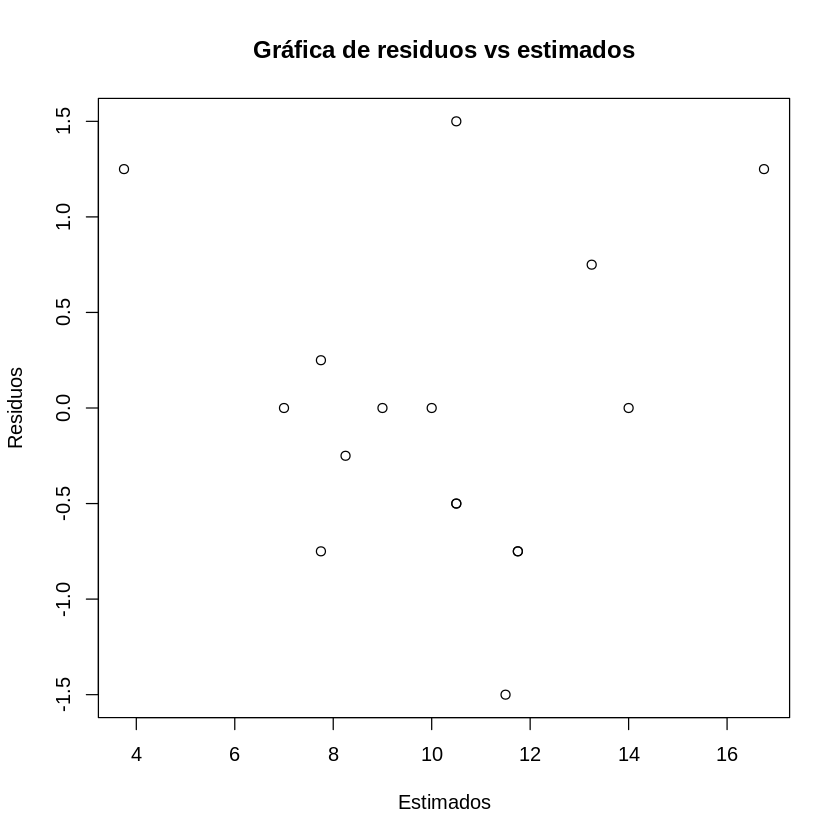

In [63]:
plot(estimados,residuos,xlab="Estimados",ylab="Residuos",main="Gráfica de residuos vs estimados")

## Prueba de homogeneidad de varianza, (homocedasticidad) 

* Ho: las varianzas de los tratamientos son homogéneas vs 
* Ha: las varianzas de los trat. no son Homogéneas.

In [66]:
bartlett.test(residuos,trat)


	Bartlett test of homogeneity of variances

data:  residuos and trat
Bartlett's K-squared = 1.0104, df = 3, p-value = 0.7987


No se rechaza la hipótesis nula, así que las varianzas de los tratamientos son homogénas.

In [ ]:
library(agricolae)
library(foreign)
library(multcomp)
library(LSD)

### Prueba de Duncan

In [ ]:
model<-aov(y~trat+orden+operador)
out <- duncan.test(model,"trat",main="Metodos de ensamblado")

In [67]:
duncan.test(model,"trat",alpha=0.05,console=TRUE)


Study: model ~ "trat"

Duncan's new multiple range test
for y 

Mean Square Error:  1.75 

trat,  means

      y      std r Min Max
a  7.50 2.081666 4   5  10
b  9.25 2.217356 4   7  12
c 13.25 3.593976 4  10  18
d 11.00 2.160247 4   9  14

Alpha: 0.05 ; DF Error: 6 

Critical Range
       2        3        4 
2.288876 2.372245 2.413543 

Means with the same letter are not significantly different.

      y groups
c 13.25      a
d 11.00     ab
b  9.25     bc
a  7.50      c


### Prueba se Scheffe 

In [68]:
comparison <- scheffe.test(model,"trat", group=TRUE,console=TRUE,main="metodos")


Study: metodos

Scheffe Test for y 

Mean Square Error  : 1.75 

trat,  means

      y      std r Min Max
a  7.50 2.081666 4   5  10
b  9.25 2.217356 4   7  12
c 13.25 3.593976 4  10  18
d 11.00 2.160247 4   9  14

Alpha: 0.05 ; DF Error: 6 
Critical Value of F: 4.757063 

Minimum Significant Difference: 3.533736 

Means with the same letter are not significantly different.

      y groups
c 13.25      a
d 11.00     ab
b  9.25      b
a  7.50      b
